<a href="https://colab.research.google.com/github/Saul-Ochoa/REDESNEURONALPYTHON/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Neuronal Basica**

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import pandas as pd
import time
import warnings

## **Una Sola Capa**

In [4]:
train='https://raw.githubusercontent.com/Saul-Ochoa/REDESNEURONALPYTHON/main/Data/training.csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/REDESNEURONALPYTHON/main/Data/testing.csv'

In [5]:
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')

In [6]:
train.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


In [8]:
train.shape

(16000, 2)

In [11]:
train.columns

Index(['Celsius', 'Fahrenheit'], dtype='object')

In [13]:
celsius=np.array(train['Celsius'],dtype=float)
fahrenheit = np.array(train['Fahrenheit'], dtype=float)

In [14]:
capa=tf.keras.layers.Dense(units=1,input_shape=[1]) #1 red neuronal y 1 entrada
modelo=tf.keras.Sequential([capa])

In [15]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [16]:
#comenzamos entrenar el modelo
EPOCHS=1000
historical=modelo.fit(celsius,fahrenheit,epochs=EPOCHS,verbose=False)
print('modelo entrenado')

modelo entrenado


In [17]:
fig = px.scatter(y=historical.history['loss'],title='Predicciones')
fig.update_xaxes(title_text='Epoca')
fig.update_yaxes(title_text='Magnitud de Perdida')
fig.show()

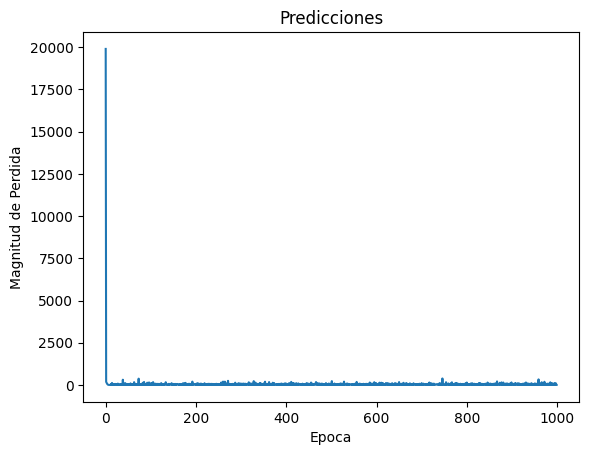

In [18]:
plt.xlabel("Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(historical.history['loss'])
plt.title("Predicciones")
plt.show()

In [23]:
test.head()

,Celsius,Fahrenheit
0,259,NaN
1,2351,NaN
2,2112,NaN
3,2239,NaN
4,1016,NaN


In [25]:
#Hagamos prediccion
resultado=modelo.predict(test['Celsius'])
#print("El resultado es " + str(resultado) + " fahrenheit!")
resultado

250/250 [==============================] - 1s 2ms/step


array([[ 498.20023],
       [4263.8003 ],
       [3833.6    ],
       ...,
       [4292.6006 ],
       [1265.0002 ],
       [2508.8003 ]], dtype=float32)

In [26]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.8]], dtype=float32), array([32.00025], dtype=float32)]


In [27]:
a=100*1.8 + 32.00025
a

212.00025

## **Con 2 capas intermedias y 3 neuronas**

In [36]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [37]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [38]:
#comenzamos entrenar el modelo
EPOCHS=100
historical=modelo.fit(celsius,fahrenheit,epochs=EPOCHS,verbose=False)
print('modelo entrenado')

modelo entrenado


In [39]:
fig = px.scatter(y=historical.history['loss'],title='Predicciones')
fig.update_xaxes(title_text='Epoca')
fig.update_yaxes(title_text='Magnitud de Perdida')
fig.show()

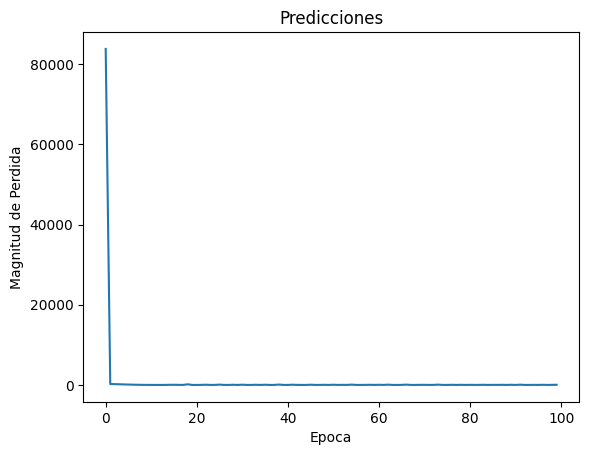

In [40]:
plt.xlabel("Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(historical.history['loss'])
plt.title("Predicciones")
plt.show()

In [45]:
test.head()

,Celsius,Fahrenheit
0,259,NaN
1,2351,NaN
2,2112,NaN
3,2239,NaN
4,1016,NaN


In [44]:
print("Hagamos una predicción!")
resultado = modelo.predict(test['Celsius'])
resultado

Hagamos una predicción!
250/250 [==============================] - 0s 2ms/step


array([[ 498.1919],
       [4263.8105],
       [3833.608 ],
       ...,
       [4292.6104],
       [1264.9955],
       [2508.8015]], dtype=float32)

In [47]:
test['Fahrenheit']=resultado.round(2)
test.head()

,Celsius,Fahrenheit
0,259,498.190002
1,2351,4263.810059
2,2112,3833.610107
3,2239,4062.209961
4,1016,1860.800049


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Celsius'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Fahrenheit'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Celsius'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Fahrenheit'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['index', 'Celsius'], ['Celsius', 'Fahrenheit']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['index', 'Celsius', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'Fahrenheit', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'count()', None], **{})
chart

In [42]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.30730355,  1.1337968 , -0.00251288]], dtype=float32), array([-6.31934  ,  8.492697 ,  3.3915598], dtype=float32)]
[array([[ 0.6989861 ,  0.7300161 ,  1.2176943 ],
       [-1.1118423 , -0.8806989 ,  0.32894614],
       [ 0.6681305 , -0.53467935,  0.12138196]], dtype=float32), array([-6.833192 , -6.354305 , -3.6570544], dtype=float32)]
[array([[-0.59962827],
       [-0.7484987 ],
       [ 0.00194507]], dtype=float32), array([5.791272], dtype=float32)]
